In [2]:
# VALIDATION CURVES
# Let's look at an example of using cross-validation to compute the validation
# curve for a class of models. We will use a "polynomial regression" model,
# that is a generalized linear model in which the degree of the polynomial is
# a tunable parameter. For example, a degree 1 polynomial fits a straight
# line to the data, while a degree 3 polynomial fits a cubic curve to the
# data. We can generalize this to any number of polynomial features, and we
# can implement this in scikit learn witha simple linear regression combined 
# with the polynomial preprocessor.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

In [3]:
# Now let's create some data to which we will fit our model
import numpy as np

def make_data(N, err = 1.0, rseed = 1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [4]:
def learning_curve() -> None:
    x = np.linspace(0, 1, 1000)
    N = np.linspace(0, 1, 1000)
    y1 = 0.75 + 0.2 * np.exp(-4 * N)
    y2 = 0.7 - 0.6 * np.exp(-4 * N)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y1, lw=10, alpha=0.5, color='blue')
    ax.plot(x, y2, lw=10, alpha=0.5, color='red')
    
    ax.text(0.2, 0.83, "training score", rotation=-10, size=16, color='blue')
    ax.text(0.2, 0.5, "validation score", rotation=30, size=16, color='red')
    
    ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
    ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
    ax.set_ylabel(r'model score $\longrightarrow$', size=14)
    
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    
    ax.set_title("Learning Curve Schematic", size=16)
    
    fig.savefig('images/05.03-learning-curve.png')
    return

In [5]:
# We can now visualize our data, along with polynomial fits of several degrees.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('dark_background')

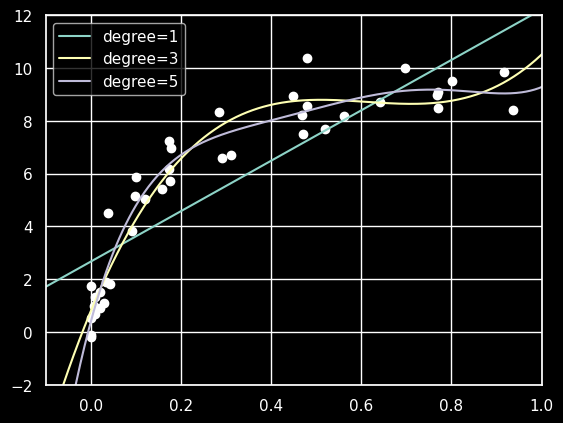

In [6]:
X_test = np.linspace(-.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color = 'white')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = f'degree={degree}')
plt.xlim(-.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc = 'best');
# The knob controlling model complexity in this case is the degree of the
# polynomial, which can be any non-negative integer. A useful question to
# answer is this: what degree of polynomial provides a suitable trade-off
# between bias (underfitting) and variance(overfitting)?

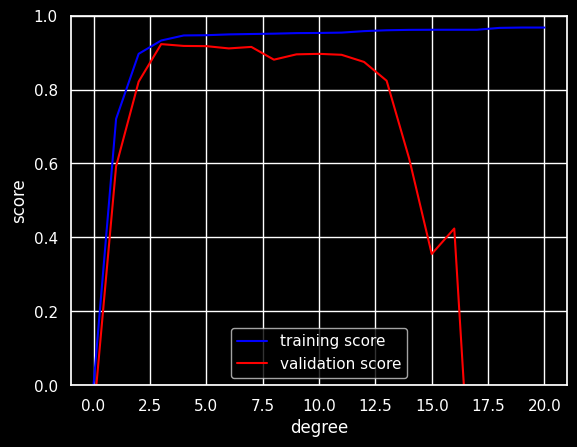

In [7]:
# We can make progress in this by visualizing the validation curve for this
# particular data and model; we can do this strightforwardly using the
# validation_curve convenience routine provided by scikit-learn. Given a
# model, data, parameter name, and a range to explore, this function will
# automatically compute both the training score and the validation score
# across the range.
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(),
                                X, y,
                                param_name = 'polynomialfeatures__degree',
                                param_range = degree, cv = 7)
plt.plot(degree, np.median(train_score, 1), color = 'blue',
         label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red',
         label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
# This shows precisely the qualitative behavior we expect: the training score
# is everywhere higher than the validation score; the training score is
# monotonically improving with increased model complexity, and the validation
# score reaches a maximum before dropping off as the model becomes overfit.

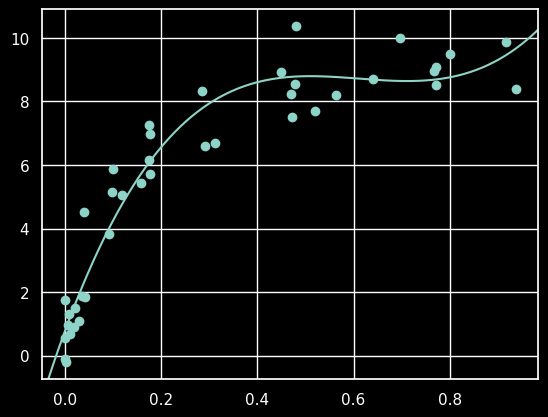

In [8]:
# From the validation curve, we can read off that the optimal trade-off
# between bias and variance is found for a third-order polynomial; we can
# compute and display this fit over the original data as follows.
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);
# Notice that finding this optimal model did not actually require us to
# compute the training score, but examining the relationship between the 
# training score and validation score can give us useful insight into the
# performance of the model.

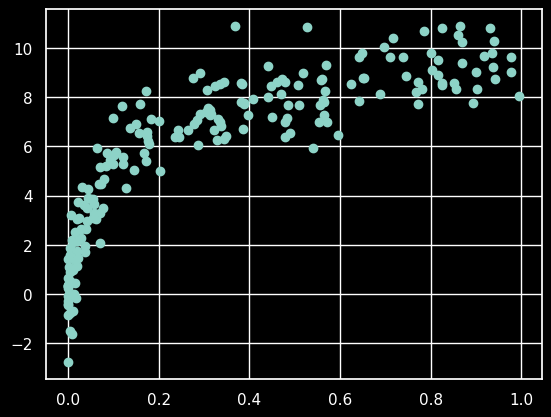

In [9]:
# LEARNING CURVES
# One important aspect of model complexity is that the optimal model will 
# generally depend on the size of your training data. For example, let's
# generate a new dataset with a factor of five more points.
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

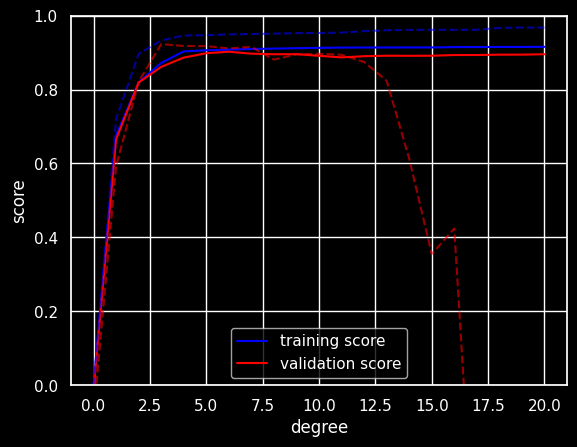

In [10]:
# We will duplicate the preceding code to plot the validation curve for this
# larger data-set; for reference let's over-plot the previous results as well.
degree = np.arange(0, 21)
train_score2, val_score2 = validation_curve(PolynomialRegression(),
                                X2, y2,
                                param_name = 'polynomialfeatures__degree',
                                param_range = degree, cv = 7)
plt.plot(degree, np.median(train_score2, 1), color = 'blue',
         label = 'training score')
plt.plot(degree, np.median(val_score2, 1), color = 'red',
         label = 'validation score')
plt.plot(degree, np.median(train_score, 1), color = 'blue',
         alpha = .6, linestyle = 'dashed')
plt.plot(degree, np.median(val_score, 1), color = 'red',
         alpha = .6, linestyle = 'dashed')
plt.legend(loc = 'lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
# The solid lines show the new results, while the fainter dashed lines show
# the results of the previous smaller dataset. It is clear that the larger
# dataset can support a much more complicated mdodel: the peak here is 
# probably around a degree of 6, but even a degree-20 model is not seriously
# overfitting the data; the validation and training scores remain very close.
# Thus, we see that the behavior of the validation curve has not one, but two,
# important inputs: the model complexity and the number of training points. 
# It is often useful to explore the behavior of the model as a function of
# the number of training points, which we can do by using increasingly larger 
# subsets of the data to fit our model. A plot of the training/validation
# score with respect to the size of the training set is known as a 
# LEARNING CURVE.

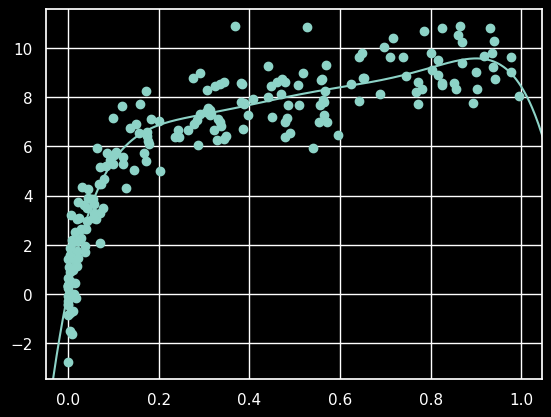

In [11]:
# Degree 6 polynomial regression over the denser dataset!
plt.scatter(X2.ravel(), y2)
lim = plt.axis()
y2_test = PolynomialRegression(6).fit(X2, y2).predict(X_test)
plt.plot(X_test.ravel(), y2_test);
plt.axis(lim);

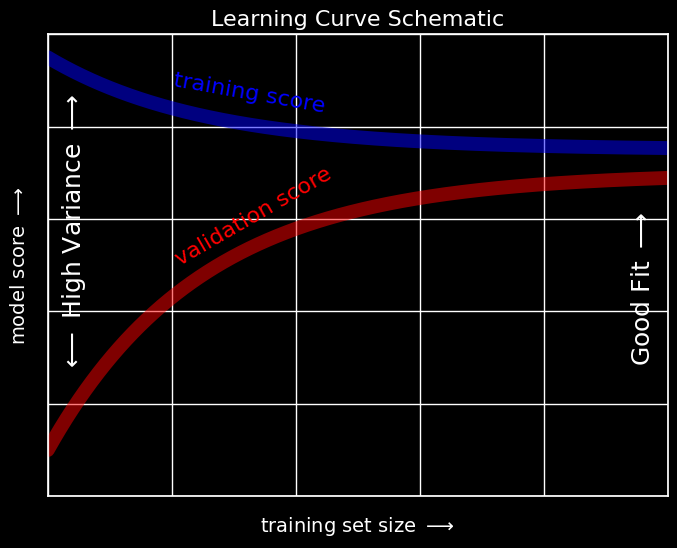

In [12]:
# With these features in mind, we would expect a learning curve to look
# qualitatively like this one.
learning_curve()
# The notable feature of the learning curve is the convergence to a
# particular score as the number of training samples grows. In particular,
# once you have enough points that a particular model has converged, adding 
# more training data will not help you! The only way to increase model 
# performance in this case is to use another (often, more complex), model.

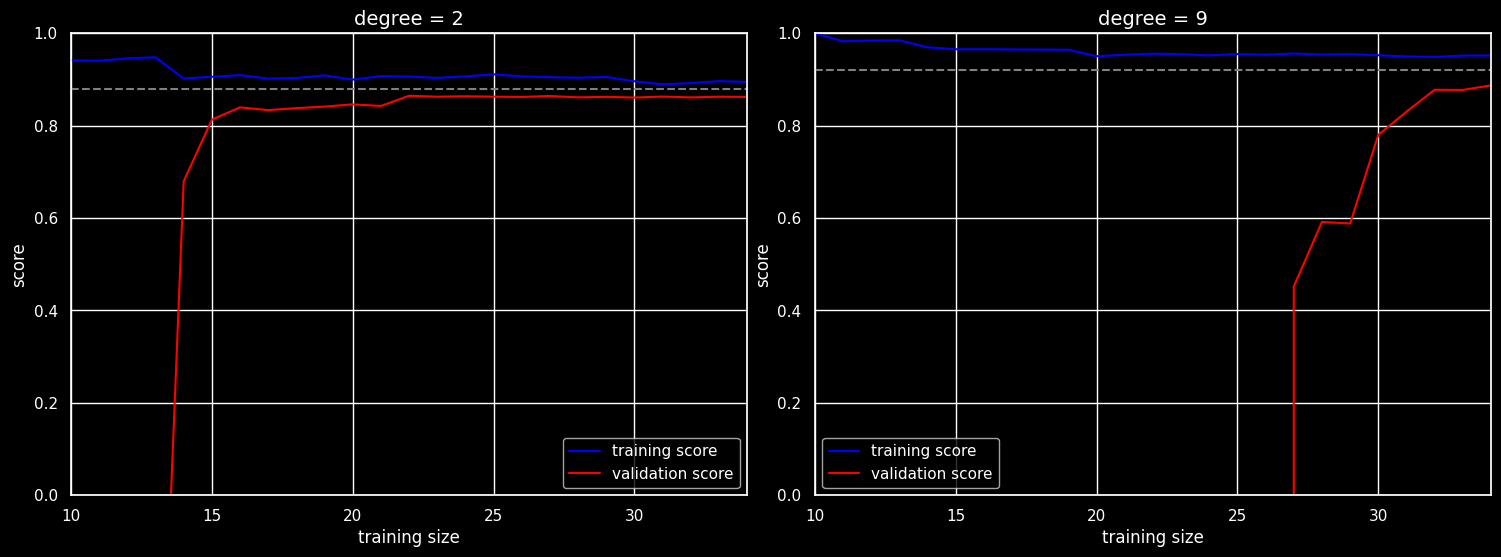

In [13]:
# LEARNING CURVES IN SCIKIT-LEARN
# Scikit-learn offers a convenient utility for computing such learning curves
# from your models; here we will compute a learning curve for our original
# dataset with a second order polynomial model and a ninth-order polynomial.
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = .0625, right = .95, wspace = .1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv = 7,
                                         train_sizes = np.linspace(.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color = 'blue', 
                label = 'training score')
    ax[i].plot(N, np.mean(val_lc, 1), color = 'red', 
                label = 'validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                    color = 'gray', linestyle = 'dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title(f'degree = {degree}', size = 14)
    ax[i].legend(loc = 'best')
# This is a valuable diagnostic, because it gives us a visual depiction of
# how our model responds to increasing training data. In particular, when
# your learning curve has already converged, adding more training data WILL
# NOT significantly improve the fit! This is clear if you look at the left
# panel, the learning curve for the degree-2 model. If we wish to increase 
# the converged score, we need to use a different (and more complex) model.
# At the cost of higher model variance we are able to increase the score of
# the convergence. If we were to add even more data points, the learning
# curve for the more complicated model would eventually converge.

In [19]:
# VALIDATION IN PRACTICE: GRID SEARCH
# In practice, models generally have more than one knob to turn, and thus
# plots of validation and learning curves change from lines to 
# multidimensional surfaces. In these cases, such visualizations are 
# difficult and we would rather simply find the particular model that 
# maximizes the validation score. Scikit-learn provides automated tools to
# do this in the grid_search module.
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              }
grid = GridSearchCV(PolynomialRegression(), param_grid, cv = 7)
# Notice that like a normal estimator, this has not yet been applied to any 
# data.

In [20]:
# Calling the fit() method will fit the model at each grid point, keeping
# track of the scores along the way.
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [28]:
# Now that this is fit, we can ask for the best parameters as follows.
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

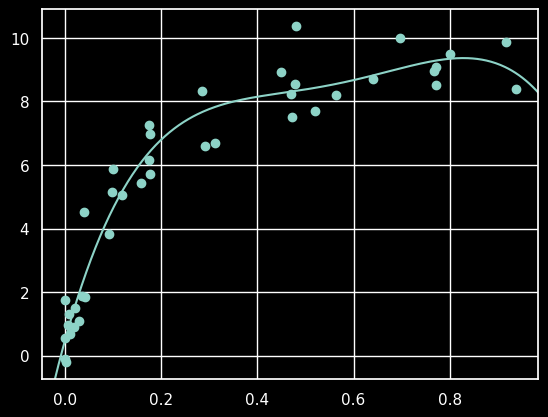

In [23]:
# Finally, if we wish, we can use the best model and show the fit to our
# data using previous code.
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);

In [ ]:
# The grid search provides many more options, including the ability to 
# specify a custom scoring function, to parallelize the computations, to do
# randomized searches, and more.